In [36]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [37]:
im = Image.open("asset_praktikum_akbar.jpg").resize((255,255))
arr = np.array(im.copy())
arrEq = np.zeros(arr.shape, dtype=np.uint8)

In [38]:
keys = np.arange(256)
histOri = np.zeros((256), dtype=np.uint32)
histEq = np.zeros((256), dtype=np.uint32)

In [39]:
minI = 30
maxI = 240
minO = 0
maxO = 255
for y in range(arr.shape[0]):
    for x in range(arr.shape[1]):
        akum = (int(arr[y,x,0]) + int(arr[y,x,1]) + int(arr[y,x,2]))
        tmp = max(min(int(akum/3),255),0)
        arr[y,x] = [tmp,tmp,tmp]
        histOri[tmp] = histOri[tmp] + 1;
        tmpEq = np.floor((tmp-minI)*(((maxO-minO)/(maxI-minI))+minO)).astype(np.uint8)
        tmp = max(min(tmpEq,255),0)
        arrEq[y,x] = [tmpEq,tmpEq,tmpEq]
        histEq[tmpEq] = histEq[tmpEq]+1;

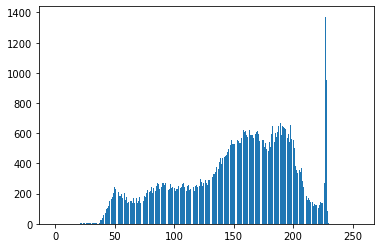

In [40]:
fig = plt.figure(1)
plt.bar(keys,histOri)
fig.canvas.draw()
dataOri = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
dataOri = dataOri.reshape(fig.canvas.get_width_height()[::-1]+(3,))
histImageOri = Image.fromarray(dataOri).resize((255,255))
histNpOri = np.array(histImageOri)

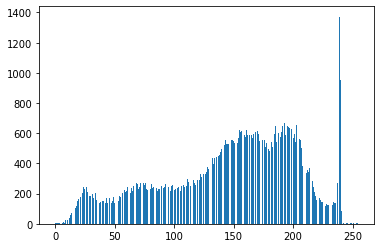

In [41]:
fig = plt.figure(2)
plt.bar(keys,histEq)
fig.canvas.draw()
dataEq = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
dataEq = dataEq.reshape(fig.canvas.get_width_height()[::-1]+(3,))
histImageEq = Image.fromarray(dataEq).resize((255,255))
histNpEq = np.array(histImageEq)

In [44]:
Image.fromarray(np.hstack((np.vstack((histNpOri,arr)),np.vstack((histNpEq,arrEq))))).show()